<a href="https://colab.research.google.com/github/vincentei/Python_aux/blob/master/python_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime as dt
import pytz
import time
import os
import sys
import dateutil.parser
from scipy import sparse
import re

In [0]:
import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO

## Numpy

In [0]:
# creating numpy arrays with dimension (3,2) and (2,4) , (n,m) * (m,k)
A = np.array([[1,2], [3,4],[5,6]])
B = np.array([[1,2,3,4], [5,6,7,8]])
print (A.shape)
print (B.shape)

(3, 2)
(2, 4)


In [0]:
# calc multiply two matrices, dot product between two matrices
C = np.matmul(A,B)
print (C.shape)

(3, 4)


In [0]:
# create numpy array with range from 1 to 10, then reshape into (2,5) matrix
a = np.arange(1,11)
print (a)
A = a.reshape(2,5)
print (A)

[ 1  2  3  4  5  6  7  8  9 10]
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]


In [0]:
# now create (2,3) random numpy with same seed
np.random.seed(42)
A = np.random.randn(3,10)

In [0]:
# concatenate two arrays
a = np.array([1,2,3])
b = np.array([4,5,6])
print(np.concatenate([a,b]))

[1 2 3 4 5 6]


In [0]:
# concatenate two matrices
a = np.array([[1,2,3],[3,4,3]])
b = np.array([[1,2,3],[3,4,3]])
c = np.concatenate([a,b])
d = np.concatenate([a,b],axis=1)
print(c.shape)
print(d.shape)

(4, 3)
(2, 6)


In [0]:
# sum two arrays
a = np.array([1,2,3])
b = np.array([4,5,6])
print(a + b)

[5 7 9]


In [0]:
# clipping (ie squash value of numpy array between min, max)
a = np.arange(6)
print (a)
print (np.clip(a,2,4))

[0 1 2 3 4 5]
[2 2 2 3 4 4]


In [0]:
# sample idx from distribution
h = np.array([0.1, 0.2, 0.5,0.2])
#index = np.random.choice([0, 1, 2, 3], p = h.ravel())
#print(index)
index2 = np.random.choice(np.arange(len(h)), p = h.ravel())
print(index2)

2


In [0]:
# give index of max value in numpy array
a = np.array([1,33,4,5])
print(np.argmax(a))

1


In [0]:
# give index of max value in 2d numpy array
a = np.array([[1,33,4,5],[1,2,3,44]])
print(np.argmax(a))
print(np.argmax(a,axis=0))
print(np.argmax(a,axis=1))
print(np.argmax(a,axis=-1)) #-1 impies the last axis

7
[0 0 0 1]
[1 3]
[1 3]


In [0]:
# stepping
a = np.arange(1,1000)
b = a[0:168:24]
print(b)

[  1  25  49  73  97 121 145]


In [0]:
168 // 24 + 1

8

### Reshape

In [0]:
# (n,) to (n,1)
a = np.array([1,2,3])
print (a.shape)
a = a[:,None]
print(a.shape)

(3,)
(3, 1)


In [0]:
# reshape 6 into 3*2*1
a = np.asarray([1,52,6,5,9,6])
print(a.shape)
b = a.reshape(3,2,1)
print(b)
print(b.shape)

(6,)
[[[ 1]
  [52]]

 [[ 6]
  [ 5]]

 [[ 9]
  [ 6]]]
(3, 2, 1)


In [0]:
a = np.asarray([1,55,88,66])
print(a.shape)
b = a.reshape(-1,1)
print(b.shape)

(4,)
(4, 1)


### Make input for LSTM

In [0]:
a = np.arange(1,11)
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [0]:
look_back = 4
data = []
for i in range(0,len(a)-look_back-1,2):
  data.append(a[i:i+look_back])  

In [0]:
data

[array([1, 2, 3, 4]), array([3, 4, 5, 6]), array([5, 6, 7, 8])]

### Arrange

In [0]:
# arrange let's you make a vector
# np.arrange(start, stop, step)
a = np.arange(1,19,3)
a

array([ 1,  4,  7, 10, 13, 16])

### Linspace

In [0]:
#  give me 4 number equally spaced on interval [2.5,10]
a = np.linspace(2.5,10,num=4)
a

array([ 2.5,  5. ,  7.5, 10. ])

### Add column to numpy matrix

In [0]:
a = np.arange(0,6,1).reshape(3,2)
print(a.shape)
a

(3, 2)


array([[0, 1],
       [2, 3],
       [4, 5]])

In [0]:
# use np.append or np.hstack
b = np.asarray([1,2,3]).reshape(-1,1)
print(b.shape)
c = np.hstack((a,b))
d = np.append(a,b,axis=1)
print(c.shape)
print(d.shape)

(3, 1)
(3, 3)
(3, 3)


### Square of numpy

In [0]:
a = np.arange(0,6,1).reshape(3,2)
c = np.square(a)
c

array([[ 0,  1],
       [ 4,  9],
       [16, 25]])

### Sparse matrix

In [0]:
A = np.array([[1,2,3],[0,0,0],[0,9,7]])
A

array([[1, 2, 3],
       [0, 0, 0],
       [0, 9, 7]])

In [0]:
A_sparse = sparse.csr_matrix(A)
print(A_sparse) # only non zero elements are stored

  (0, 0)	1
  (0, 1)	2
  (0, 2)	3
  (2, 1)	9
  (2, 2)	7


### Max of all rows in matrix

In [0]:
A = np.array([[1,2,3],[0,0,0],[0,9,7]])
A

array([[1, 2, 3],
       [0, 0, 0],
       [0, 9, 7]])

In [0]:
np.max(A,axis=1)

array([3, 0, 9])

### Flatten

In [0]:
B = A.flatten()
print (B.shape)
B

(9,)


array([1, 2, 3, 0, 0, 0, 0, 9, 7])

In [0]:
C = A.reshape(-1,1) # -1 means as many as needed
print(C.shape)

(9, 1)


### Diagonal

In [0]:
A.diagonal()

array([1, 0, 7])

In [0]:
A.trace() # sum all values of the diagonal

8

## Strings

In [0]:
# remove all rows in col in df that has certain string
df = pd.DataFrame({'Product':['H01','H02','H03'],'Price':[22,33,44]})
idx = df['Product'].str.contains('02')
df = df.loc[~idx]
df.head()

,Price,Product
0,22,H01
2,44,H03


In [0]:
# remove from string
s1 = 'appelmoes'
s2 = s1[:4] + s1[5:]
print(s2)

appemoes


### Leading zero

In [0]:
# covert number to format 0 = '000' 1 is '0100' 2 is '0200' 16 is '1600'
a = 1
b = "{:02}".format(a)
print(b)
c = b + '00'
print(c)

01
0100


### Join multiple strings into list

In [0]:
'_'.join(['hoi','appel'])

'hoi_appel'

## Splitting

In [0]:
# split string
s = "hallo/wie/is/daar"
print(s.split('/'))

['hallo', 'wie', 'is', 'daar']


## List

In [0]:
# sub set that is not in other list
a = ['hoi','appel','banaan','kikker']
b = ['appel','banaan']

In [0]:
main_list = list(set(a) - set(b))
main_list

['kikker', 'hoi']

In [0]:
# lists are mutable, one can add data
a.append('kikker')
a

['hoi', 'appel', 'banaan', 'kikker', 'kikker']

In [0]:
# remove something from list
a.remove('kikker')
a

['hoi', 'appel', 'banaan', 'kikker']

In [0]:
# with pop you will remove based on index
a.pop(0)
a

['appel', 'banaan', 'kikker']

In [3]:
# adding two lists
a = [0] + [3, 5, 6]
a

[0, 3, 5, 6]

### List comprehension

In [0]:
# one line list comprehension
# https://towardsdatascience.com/python-for-data-science-8-concepts-you-may-have-forgotten-i-did-825966908393
a = [1,2,3,4]
b = [i**2 for i in a]
b

[1, 4, 9, 16]

In [0]:
# one line list comprehension with if statement
a = [1,2,3,4]
b = [i**2 for i in a if i < 4]
b

[1, 4, 9]

### List to string

In [0]:
a = ['a','b','c']
b = ''.join(a)
c = ', '.join(a)
print(b)
print(c)

abc
a, b, c


### Zip

In [0]:
a = [1,8,9]
b = [6,8,1]
zip(a,b)

[(1, 6), (8, 8), (9, 1)]

In [0]:
for i in zip(a,b): # i,j
  print (i)
  #print (j)

(1, 6)
(8, 8)
(9, 1)


### Enumerate

In [0]:
# with enumerate you get the index as well
a = ['banana','peach','apple']
for id, fruit in enumerate(a):
  print(id)
  print(fruit)

0
banana
1
peach
2
apple


## Tuples

In [0]:
# tuples are immutable (i.e. you can not change them)
t = ('appel','banaan','tomaat')
t

('appel', 'banaan', 'tomaat')

In [0]:
# find the index
t.index('tomaat')

2

In [0]:
# tuple slicing
t[1:]

('banaan', 'tomaat')

In [0]:
# tuples are comparable and hashable so we can sort lists of 
# them and use them as ley values in python dict
#https://www.pythonlearn.com/html-008/cfbook011.html


## Dictionary

- keys of dicts are immutable
- key can string, integer or tuple
- seel also: http://www.pybloggers.com/2018/10/python-dictionary-tutorial/

In [0]:
# create dict with the bracket method
dd = {'ali':178,
      'johan':'188',
      'Doei':'48'}

# other way of creation with dict method
dd2 = dict(ali=178,
      johan='188',
      Doei='48')

# create dict with tuple list
tuple_list = [('ali',178),('johan','188'),('Doei','48')]
dd3 = dict(tuple_list)

In [0]:
dd == dd2 == dd3

True

In [0]:
d = {'ali':178,
     'johan':[188,1],
     'Doei':{'appel':20,
          'banaan':[30,100],
          'peer':40}}

In [0]:
# how many element are in my dict?
print(len(dd))
print(len(d))

3
3


### Data access

In [0]:
# data access
print(d['Doei'])
print(d['Doei']['peer'])
print(d['johan'])
print(d['johan'][0])

{'peer': 40, 'appel': 20, 'banaan': [30, 100]}
40
[188, 1]
188


### Adding items

In [0]:
# add new item
dd['huis'] = 51
dd[5] = 22
dd

{5: 22, 'Doei': '48', 'ali': 178, 'huis': 51, 'johan': '188'}

In [0]:
# change item
dd[5] = 444
dd

{5: 444, 'Doei': '48', 'ali': 178, 'huis': 51, 'johan': '188'}

In [0]:
# add item
d['Doei']['mandarijn'] = 100
d

{'Doei': {'appel': 20, 'banaan': [30, 100], 'mandarijn': 100, 'peer': 40},
 'ali': 178,
 'johan': [188, 1]}

### Membership checking

In [0]:
# If we want to check if a key exists within a dictionary, we can use the in operator.
'Doei' in d

True

In [0]:
print('appel' in d)
print('appel' in d['Doei'])

False
True


### Looping techniques

In [0]:
for key in d.keys():
    print(key)

Doei
johan
ali


In [0]:
# print the values
for val in d.values():
    print(val)

{'peer': 40, 'appel': 20, 'banaan': [30, 100], 'mandarijn': 100}
[188, 1]
178


In [0]:
# now both key and value at the same time
for key, val in d.items():
    print(key,val)

('Doei', {'peer': 40, 'appel': 20, 'banaan': [30, 100], 'mandarijn': 100})
('johan', [188, 1])
('ali', 178)


### Dictionary comprehesion
 A “comprehension” in computer science terms means to perform some task or function on all items of a collection (like a list). A dictionary comprehension is similar to a list comprehension in terms of syntax, but instead creates dictionaries from a base list

In [0]:
nums = [1, 2, 3, 4, 5]

dict_comprehension = {
    str(n) : "The corresponding key is " + str(n) for n in nums
}

In [0]:
for key, val in dict_comprehension.items():
    print(key,val)

('1', 'The corresponding key is 1')
('3', 'The corresponding key is 3')
('2', 'The corresponding key is 2')
('5', 'The corresponding key is 5')
('4', 'The corresponding key is 4')


### Update

In [0]:
# update allows you to add key value pairs of other dict, if key already exists it's overwritten
a = {'appel':22}
b = {'tuin':33,'appel':2}
a.update(b)
print(a)

{'appel': 2, 'tuin': 33}


## Plotting

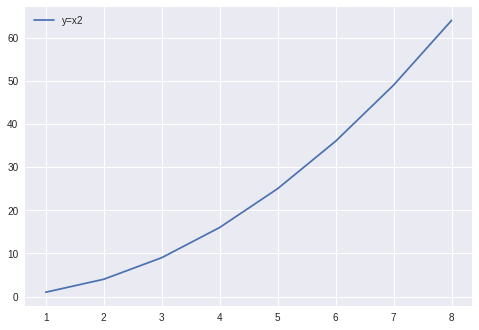

In [0]:
# make plot of two numpy arrays
x = np.array([1,2,3,4,5,6,7,8])
y = np.array([1,4,9,16,25,36,49,64])
plt.plot(x,y,label = 'y=x2')
plt.legend()
plt.show()

## Other stuff

In [0]:
# the modulo operator, the remainder from division
2 % 300

2

In [0]:
TESTDATA = StringIO("""col1;col2;col3
    1;4.4;99
    2;4.5;200
    3;4.7;65
    4;3.2;140
    """)

df = pd.read_csv(TESTDATA, sep=";")

In [0]:
print (sys.version)

2.7.14 (default, Sep 23 2017, 22:06:14) 
[GCC 7.2.0]


## Dataframe

In [0]:
# Create dataframe
df = pd.DataFrame({'a':[1,2,3],'b':[3,4,5]})

In [0]:
# dataframe from numpy array
names = ['apple','orange','apple','banana']
price = [1,2,5,10]
df = pd.DataFrame({'names':names,'price':price})
df.head()

,names,price
0,apple,1
1,orange,2
2,apple,5
3,banana,10


In [0]:
a = np.array([[1,1,1],[2,2,2],[3,3,3]])
df = pd.DataFrame(a,columns=['first','second','third'])
df.head()

,first,second,third
0,1,1,1
1,2,2,2
2,3,3,3


In [0]:
# make new column price_sqr using the apply function
df['price_sqr'] = df['price'].apply(lambda x: x*x)
df.head()

,names,price,price_sqr
0,apple,1,1
1,orange,2,4
2,apple,5,25
3,banana,10,100


In [0]:
# add 10 to price of apple
idx = df['names'] == 'apple'
df.loc[idx,'price'] = df.loc[idx,'price'] + 10
df.head()

,names,price,price_sqr
0,apple,11,1
1,orange,2,4
2,apple,15,25
3,banana,10,100


In [0]:
# rename column
df.rename(columns = {'names':'name'},inplace=True)
df.head()

,name,price,price_sqr
0,apple,11,1
1,orange,2,4
2,apple,15,25
3,banana,10,100


In [0]:
# sort by name
df =df.sort_values(by=['name','price'])
df.tail(10)

,name,price,price_sqr
0,apple,11,1
2,apple,15,25
3,banana,10,100
1,orange,2,4


In [8]:
# new df with index and columns
index = pd.date_range(dt.date(2018,1,1),periods=5,freq='D')
columns = ['weigt','price']
df = pd.DataFrame(index=index,columns=columns)
df

,weigt,price
2018-01-01,NaN,NaN
2018-01-02,NaN,NaN
2018-01-03,NaN,NaN
2018-01-04,NaN,NaN
2018-01-05,NaN,NaN


### Multiple dataframes

In [0]:
# concatenate multiple df's into one
df1 = pd.DataFrame({'a':[1,2,3],'b':[3,4,5]})
df2 = pd.DataFrame({'a':[10,20,30],'b':[30,40,50]})

df_all =[]

df_all.append(df1)
df_all.append(df2)

df_all = pd.concat(df_all)
df_all.head()

,a,b
0,1,3
1,2,4
2,3,5
0,10,30
1,20,40


In [0]:
# reset the index, do not insert the index as a column into the df
df_all.reset_index(inplace=True,drop=True)
df_all.head()

,a,b
0,1,3
1,2,4
2,3,5
3,10,30
4,20,40


In [8]:
# pd concat does outer join
index1 = pd.date_range(dt.datetime(2018,1,1,0,0),periods=5,freq='D',tz='Europe/Amsterdam')
index2 = pd.date_range(dt.datetime(2018,1,3,0,0),periods=5,freq='D',tz='Europe/Amsterdam')

df1 = pd.DataFrame({'weight1':[1,5,8,3,8]},index = index1)
df2 = pd.DataFrame({'weight2':[10,50,80,30,80]},index = index2)
df_all = pd.concat([df1,df2],axis=1)
df_all

,weight1,weight2
2018-01-01 00:00:00+01:00,1.0,NaN
2018-01-02 00:00:00+01:00,5.0,NaN
2018-01-03 00:00:00+01:00,8.0,10.0
2018-01-04 00:00:00+01:00,3.0,50.0
2018-01-05 00:00:00+01:00,8.0,80.0
2018-01-06 00:00:00+01:00,NaN,30.0
2018-01-07 00:00:00+01:00,NaN,80.0


### Groupby

In [0]:
# dataframe from numpy array
name = ['apple','orange','apple','banana','banana']
price = [1,2,5,10,20]
weight = [6,7,10,15,25]
df = pd.DataFrame({'name':name,'price':price,'weight':weight})
df.head()

,name,price,weight
0,apple,1,6
1,orange,2,7
2,apple,5,10
3,banana,10,15
4,banana,20,25


In [0]:
# group by fruit and calc the average price, 
df_grp = df.groupby(['name'])['price'].mean() # this will return a pandas series 
print(df_grp)
print(type(df_grp))

name
apple      3
banana    15
orange     2
Name: price, dtype: int64
<class 'pandas.core.series.Series'>


In [0]:
# groupby fruit and calc the average price
df_grp = df.groupby(['name'])[['price','weight']].mean() # will return a df with index equal to the group
print(df_grp)
print(type(df_grp))

        price  weight
name                 
apple       3       8
banana     15      20
orange      2       7
<class 'pandas.core.frame.DataFrame'>


In [0]:
# groupby fruit but make a new index
df_grp = df.groupby(['name'],as_index=False)[['price','weight']].mean() # will return a df with index equal to the group
print(df_grp)
print(type(df_grp))

     name  price  weight
0   apple      3       8
1  banana     15      20
2  orange      2       7
<class 'pandas.core.frame.DataFrame'>


In [0]:
# groupby fruit
# for count also consider 'size'. size will return n for NaN values also, whereas 'count' will not.
# https://gist.github.com/conormm/fd8b1980c28dd21cfaf6975c86c74d07
df.groupby(['name'])['price','weight'].agg(['mean', 'sum', 'count']) 

price           weight          
        mean sum count   mean sum count
name                                   
apple      3   6     2      8  16     2
banana    15  30     2     20  40     2
orange     2   2     1      7   7     1

In [0]:
# now let's make a used defined function to groupby
# Volume Weighted Average Price
def vwap(x):
    return (x['weight'] * x['price']).sum() / x['weight'].sum()

In [0]:
# calc the volume weighted price
df_group = pd.DataFrame(df.groupby(['name']).apply(lambda x: vwap(x)))
df_group.head()

,0
name,
apple,3
banana,16
orange,2


In [0]:
# the column is messed up so correct this
df_group.rename(columns={ df_group.columns[0]: "vwap" }, inplace = True)
df_group.head()

,vwap
name,
apple,3
banana,16
orange,2


In [0]:
# you can also use the describe function on the group
# reference https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
df.groupby(['name'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
name,,,,,,,,
apple,2.0,3.0,2.828427,1.0,2.0,3.0,4.0,5.0
banana,2.0,15.0,7.071068,10.0,12.5,15.0,17.5,20.0
orange,1.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0


In [0]:
# groupby using a function
def group_by_in_function(mygroup):
  name = ['apple','orange','apple','banana','banana']
  country = ['NL','NL','DE','DE','DE']
  weight = [6,7,10,15,25]
  df = pd.DataFrame({'name':name,'country':country,'weight':weight})
  df_grp = df.groupby([mygroup,'country'])['weight'].mean()

  return df_grp

group_by_in_function('name')

name    country
apple   DE         10
        NL          6
banana  DE         20
orange  NL          7
Name: weight, dtype: int64

### Indices

In [0]:
# check whether elements of pandas series are in list
df = pd.DataFrame({'name':['Apple','Banana','Citrus','Apple']})
idx = df['name'].isin(['Apple','Banana'])
print(idx)

0     True
1     True
2    False
3     True
Name: name, dtype: bool


### Duplicates

In [0]:
# drop duplicates in a df
df = pd.DataFrame({'name':['Apple','Banana','Citrus','Apple']})
df.drop_duplicates(subset=['name'],inplace=True)
df.head()

,name
0,Apple
1,Banana
2,Citrus


### Long to wide

In [0]:
df = pd.DataFrame({'Country':['France','France','Germany','Germany'],'Id':['volume','price','volume','price'],'Value':[3000,42,2500,35]})
df.head()

,Country,Id,Value
0,France,volume,3000
1,France,price,42
2,Germany,volume,2500
3,Germany,price,35


In [0]:
# convert to wide format
df_wide = df.pivot(index='Country',columns='Id',values = 'Value')
df_wide.head()

Id,price,volume
Country,,
France,42,3000
Germany,35,2500


In [0]:
# if you have multiple index you can use pivot_table
df = pd.DataFrame({'Country':['France','France','Germany','Germany'],'forecast':['Mon','Mon','Mon','Mon'],'delivery':['Tue','Wed','Tue','Wed'],'Value':[3000,42,2500,35]})
df.head()

,Country,Value,delivery,forecast
0,France,3000,Tue,Mon
1,France,42,Wed,Mon
2,Germany,2500,Tue,Mon
3,Germany,35,Wed,Mon


In [0]:
df_wide = pd.pivot_table(df, values = 'Value', index=['forecast','delivery'], columns = 'Country')
df_wide.head()

Country            France  Germany
forecast delivery                 
Mon      Tue         3000     2500
         Wed           42       35

In [0]:
df_wide.reset_index(inplace=True)
df_wide.head()

Country,forecast,delivery,France,Germany
0,Mon,Tue,3000,2500
1,Mon,Wed,42,35


### Slice from a dataframe

In [0]:
# make the df
df = pd.DataFrame({'wind':[100,150,250],'solar':[50,55,60]})
df

,solar,wind
0,50,100
1,55,150
2,60,250


In [0]:
# simple slice
idx = df['solar'] >=55
df[idx]

,solar,wind
1,55,150
2,60,250


In [0]:
# double condition
idx = (df['solar']>=55) & (df['wind']>=250) # look at the bracket
df[idx]

,solar,wind
2,60,250


In [0]:
idx = (df['solar'] >= 55) | (df['wind'] >= 150)
df[idx]

,solar,wind
1,55,150
2,60,250


In [0]:
df = pd.DataFrame({'wind':[100,150,250],'solar':[50,55,60]})
idx = df['wind'] == 150
df_slice = df.loc[~idx] # creates an implicit copy will get warning

In [0]:
# set a new value to original df
"""
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing
"""
# see https://github.com/abgoswam/2016/blob/master/062016/python/pandas_views_copy.py

df.loc[2,'wind'] = 999
print(df)
print("")
print(df_slice)
print("")
df_slice.loc[2,'wind'] = -1
print(df_slice)

   solar  wind
0     50   100
1     55   150
2     60   999

   solar  wind
0     50   100
2     60   250

   solar  wind
0     50   100
2     60    -1


/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [0]:
df = pd.DataFrame({'wind':[100,150,250],'solar':[50,55,60]})
idx = df['wind'] == 150
df_slice = df.loc[~idx].copy() # creates an explicit copy no warning
print(df)
print("")
print(df_slice)
print("")
df_slice.loc[2,'wind'] = -1
print(df_slice)

   solar  wind
0     50   100
1     55   150
2     60   250

   solar  wind
0     50   100
2     60   250

   solar  wind
0     50   100
2     60    -1


### Merge

In [0]:
df1 = pd.DataFrame({'name':['appel','banana','orange'],'weight':[10,20,30]}) 
df2 = pd.DataFrame({'name':['appel','banana'],'price':[1,5]})
df_merge = df1.merge(df2,how='left',left_on =['name'],right_on = ['name'])
df_merge.head()

,name,weight,price
0,appel,10,1.0
1,banana,20,5.0
2,orange,30,NaN


### Join

In [0]:
# merging with the index
start = pd.date_range(dt.datetime(2018,1,1,0,0),periods=5,freq='1H',tz='Europe/Amsterdam')
df1 = pd.DataFrame({'weight':[1,5,8,3,8]},index = start)
df1

,weight
2018-01-01 00:00:00+01:00,1
2018-01-01 01:00:00+01:00,5
2018-01-01 02:00:00+01:00,8
2018-01-01 03:00:00+01:00,3
2018-01-01 04:00:00+01:00,8


In [0]:
start = pd.date_range(dt.datetime(2018,1,1,0,0),periods=4,freq='1H',tz='Europe/Amsterdam')
df2 = pd.DataFrame({'price':[10,15,31,8]},index = start)
df2

,price
2018-01-01 00:00:00+01:00,10
2018-01-01 01:00:00+01:00,15
2018-01-01 02:00:00+01:00,31
2018-01-01 03:00:00+01:00,8


In [0]:
# left join
df_all = df1.join(df2)
df_all

,weight,price
2018-01-01 00:00:00+01:00,1,10.0
2018-01-01 01:00:00+01:00,5,15.0
2018-01-01 02:00:00+01:00,8,31.0
2018-01-01 03:00:00+01:00,3,8.0
2018-01-01 04:00:00+01:00,8,NaN


In [0]:
# inner join
df_all = df1.join(df2,how='inner')
df_all

,weight,price
2018-01-01 00:00:00+01:00,1,10
2018-01-01 01:00:00+01:00,5,15
2018-01-01 02:00:00+01:00,8,31
2018-01-01 03:00:00+01:00,3,8


### Check NA's

In [0]:
df_merge[df_merge.isnull().any(axis=1)]

,name,weight,price
2,orange,30,NaN


###  Check NA's with set

In [0]:
# give fruit where any number is missing
df = pd.DataFrame({'name':['appel','banana','banana','kiwi'],'weight':[10,20,np.nan,88],'cost':[0,11,np.nan,np.nan]})
df

,cost,name,weight
0,0.0,appel,10.0
1,11.0,banana,20.0
2,NaN,banana,NaN
3,NaN,kiwi,88.0


In [0]:
set(df[df[['cost','weight']].isnull().any(axis=1)]['name'])

{'banana', 'kiwi'}

### Remove row with any zero

In [0]:
df = pd.DataFrame({'name':['appel','banana','orange'],'weight':[10,20,0],'cost':[0,11,0]})
df

,cost,name,weight
0,0,appel,10
1,11,banana,20
2,0,orange,0


In [0]:
# get idx of row with zero
cols = ['cost','weight']
idx = (df[cols] == 0).any(axis=1)
print(idx)

0     True
1    False
2     True
dtype: bool


In [0]:
df2 = df.loc[~idx]
df2.reset_index(inplace=True,drop=True)
df2.head()

,cost,name,weight
0,11,banana,20


### Get index of column name

In [0]:
df = pd.DataFrame({'name':['apple','banaan','peer'],'weight':[10,19,33]})

df.columns

Index([u'name', u'weight'], dtype='object')

In [0]:
df.columns.get_loc('weight')

1

### Select second and third column


In [5]:
df = pd.DataFrame({'name':['apple','banaan','peer'],'weight':[10,19,33],'price':[100,190,330]})
df = df.iloc[:,[1,2]]
df

,weight,price
0,10,100
1,19,190
2,33,330


### Get index of value

In [0]:
a = np.array([1,2,3])
#np.where(a == 3)
np.argwhere(a==3)[0][0]

2

### Row aggregation

In [0]:
df = pd.DataFrame({'price':[3,0,4],'weight':[10,19,33]})
df

,price,weight
0,3,10
1,0,19
2,4,33


In [0]:
def aggregate_row(row):
    non_zero_values = row.iloc[row.nonzero()]
    aggs = {'non_zero_mean': non_zero_values.mean(),
            'non_zero_max': non_zero_values.max()
           }
    return pd.Series(aggs)

In [0]:
df_agg = df.apply(aggregate_row, axis=1)
df_agg

,non_zero_max,non_zero_mean
0,10.0,6.5
1,19.0,19.0
2,33.0,18.5


### Multi index

In [0]:
a = np.array(['a','b','c'])
b = np.array(['apple','banana'])

multiindex = pd.MultiIndex.from_product([a, b],names=['Letter', 'Fruit'])

df = pd.DataFrame(index=multiindex)

df

Empty DataFrame
Columns: []
Index: [(a, apple), (a, banana), (b, apple), (b, banana), (c, apple), (c, banana)]

https://pandas.pydata.org/pandas-docs/stable/advanced.html

In [0]:
df = pd.DataFrame({'day':['Mon','Mon','Tue'],'asset':['E','P','P'],'wind':[100,150,250],'solar':[50,55,60]})
df = df.set_index(['day','asset'])
df

solar  wind
day asset             
Mon E         50   100
    P         55   150
Tue P         60   250

In [0]:
df.loc['Mon']

,solar,wind
asset,,
E,50,100
P,55,150


In [0]:
df.loc['Mon','E']['solar']

50

In [0]:
# Multiindex with datetime
a1 = dt.datetime(2018,1,1,0,0)
a2 = dt.datetime(2018,1,1,0,0)
b1 = dt.datetime(2018,1,1,1,0)
b2 = dt.datetime(2018,1,1,1,0)
l1 = [a1,a2,b1,b2]

In [0]:
aa1 = dt.datetime(2018,1,1,1,0)
aa2 = dt.datetime(2018,1,1,2,0)
bb1 = dt.datetime(2018,1,1,2,0)
bb2 = dt.datetime(2018,1,1,3,0)
l2 = [aa1,aa2,bb1,bb2]

In [0]:
data = pd.Series(np.random.randn(4),index=[l1,l2])
data

2018-01-01 00:00:00  2018-01-01 01:00:00    0.441518
                     2018-01-01 02:00:00   -0.406959
2018-01-01 01:00:00  2018-01-01 02:00:00   -0.132549
                     2018-01-01 03:00:00    0.710570
dtype: float64

In [0]:
# now try to localize the first axis
data1 = data.tz_localize('Europe/Amsterdam',level=0)
data1

2018-01-01 00:00:00+01:00  2018-01-01 01:00:00    0.441518
                           2018-01-01 02:00:00   -0.406959
2018-01-01 01:00:00+01:00  2018-01-01 02:00:00   -0.132549
                           2018-01-01 03:00:00    0.710570
dtype: float64

In [0]:
# localize the 2nd axis
data2 = data1.tz_localize('Europe/Amsterdam',level=1)
data2

2018-01-01 00:00:00+01:00  2018-01-01 01:00:00+01:00    0.441518
                           2018-01-01 02:00:00+01:00   -0.406959
2018-01-01 01:00:00+01:00  2018-01-01 02:00:00+01:00   -0.132549
                           2018-01-01 03:00:00+01:00    0.710570
dtype: float64

In [0]:
# slice first level
data2[dt.datetime(2018,1,1,1,0)]

2018-01-01 02:00:00+01:00   -0.132549
2018-01-01 03:00:00+01:00    0.710570
dtype: float64

In [0]:
# slice first levelbut now with loc
data2.loc[dt.datetime(2018,1,1,1,0)]

2018-01-01 02:00:00+01:00   -0.132549
2018-01-01 03:00:00+01:00    0.710570
dtype: float64

In [0]:
# slice second level
data2[:,dt.datetime(2018,1,1,2,0)]

2018-01-01 00:00:00+01:00    0.949548
2018-01-01 01:00:00+01:00   -0.454269
dtype: float64

In [0]:
data2.index[1]

(Timestamp('2018-01-01 00:00:00+0100', tz='Europe/Amsterdam'),
 Timestamp('2018-01-01 02:00:00+0100', tz='Europe/Amsterdam'))

In [0]:
# naming the index
data2.index.names = ['forecast_date','delivery_date']
data2.columns = ['rand']
data2.columns

['rand']

In [0]:
data2.rename(columns = ['rand'])
data2

forecast_date              delivery_date            
2018-01-01 00:00:00+01:00  2018-01-01 01:00:00+01:00    1.010566
                           2018-01-01 02:00:00+01:00    0.949548
2018-01-01 01:00:00+01:00  2018-01-01 02:00:00+01:00   -0.454269
                           2018-01-01 03:00:00+01:00   -0.216232
dtype: float64

In [0]:
data2.columns

['rand']

### Resample

In [24]:
df = pd.DataFrame(np.arange(1,11),index = pd.date_range(dt.datetime(2018,1,1,0,0),periods=10,freq='15min'),columns=['price'])
df.head(4)

,price
2018-01-01 00:00:00,1
2018-01-01 00:15:00,2
2018-01-01 00:30:00,3
2018-01-01 00:45:00,4


In [29]:
# now resample to hourly
df_hourly = df.resample('1H').mean()
df_hourly.head(4)

,price
2018-01-01 00:00:00,2.5
2018-01-01 01:00:00,6.5
2018-01-01 02:00:00,9.5


In [32]:
# now downsample and use pad
df_15min = df_hourly.resample('15T').pad()
df_15min

,price
2018-01-01 00:00:00,2.5
2018-01-01 00:15:00,2.5
2018-01-01 00:30:00,2.5
2018-01-01 00:45:00,2.5
2018-01-01 01:00:00,6.5
2018-01-01 01:15:00,6.5
2018-01-01 01:30:00,6.5
2018-01-01 01:45:00,6.5
2018-01-01 02:00:00,9.5


In [0]:
np.arange(1,11)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

### Append row

In [0]:
# Appending a row to df, could be done through list of dicts
l = []
l.append({'appel':10,'koe':50})
l.append({'appel':11,'koe':51})
df = pd.DataFrame(l)
df

,appel,koe
0,10,50
1,11,51


### First idx of certain value

In [0]:
# find the index of the first time price=5
df = pd.DataFrame({'name':['apple','banaan','banaan'],'price':[10,19,5]})
idx = df['price'] == 5
print(idx.idxmax())

2


### df.filter

In [0]:
# select only columns in df with 'price' in name
df = pd.DataFrame({'name':['apple','banaan','banaan'],'price':[10,19,5],'priceGBP':[22,40,10]})
df

,name,price,priceGBP
0,apple,10,22
1,banaan,19,40
2,banaan,5,10


In [0]:
df.filter(regex='price')

,price,priceGBP
0,10,22
1,19,40
2,5,10


### Stack

In [0]:
df = pd.DataFrame({'20_DOWN':[10,30,100,99],'20_UP':[10,19,5,11],'price':[22,40,10,5],'weight':[1,2,3,8],'day':['Mon','Mon','Tue','Tue'],'Asset':['E','P','E','P']})
df = df.set_index(['day','Asset'])
df

20_DOWN  20_UP  price  weight
day Asset                               
Mon E           10     10     22       1
    P           30     19     40       2
Tue E          100      5     10       3
    P           99     11      5       8

In [0]:
columns = [i for i in df.columns if '_UP' in i or '_DOWN' in i]
df_stack = df[columns].stack()
df_stack

day  Asset         
Mon  E      20_DOWN     10
            20_UP       10
     P      20_DOWN     30
            20_UP       19
Tue  E      20_DOWN    100
            20_UP        5
     P      20_DOWN     99
            20_UP       11
dtype: int64

In [0]:
df_stack2 = pd.DataFrame(df_stack)
df_stack2

0
day Asset             
Mon E     20_DOWN   10
          20_UP     10
    P     20_DOWN   30
          20_UP     19
Tue E     20_DOWN  100
          20_UP      5
    P     20_DOWN   99
          20_UP     11

In [0]:
columns = [i for i in df_stack2.reset_index().columns] + ['price','weight']
columns

['day', 'Asset', 'level_2', 0, 'price', 'weight']

In [0]:
pd.merge(df_stack2.reset_index(),
                         df.reset_index(),
                         on=['day', 'Asset'],
                         how='inner')[columns]

,day,Asset,level_2,0,price,weight
0,Mon,E,20_DOWN,10,22,1
1,Mon,E,20_UP,10,22,1
2,Mon,P,20_DOWN,30,40,2
3,Mon,P,20_UP,19,40,2
4,Tue,E,20_DOWN,100,10,3
5,Tue,E,20_UP,5,10,3
6,Tue,P,20_DOWN,99,5,8
7,Tue,P,20_UP,11,5,8


### Chain

In [0]:
df = pd.DataFrame({'price':[22,40,10,5],'weight':[1,2,3,8]})
df_new = df.drop(['price'],axis=1).rename(columns = {'weight':'weight_gr'})
df_new

,weight_gr
0,1
1,2
2,3
3,8


### Update

In [21]:
# Update existing df
index = pd.date_range(dt.date(2018,1,1),periods=3,freq='D')
columns = ['weigt','price']
df1 = pd.DataFrame(index=index,columns=columns)
df1

,weigt,price
2018-01-01,NaN,NaN
2018-01-02,NaN,NaN
2018-01-03,NaN,NaN


In [22]:
index = pd.date_range(dt.date(2018,1,1),periods=2,freq='D')
df2 = pd.DataFrame(data = {'price':[10,19]})
df2.set_index(index,inplace=True)
df2

,price
2018-01-01,10
2018-01-02,19


In [23]:
# now use update
df1.update(df2)
df1

,weigt,price
2018-01-01,NaN,10
2018-01-02,NaN,19
2018-01-03,NaN,NaN


## Apply and Map

In [0]:
# make new column using the map function
# http://book.pythontips.com/en/latest/map_filter.html
df = pd.DataFrame({'name':['apple','banaan','peer'],'price':[10,19,33]})
df['price_sqr_map'] = list(map(lambda x: x**2, df['price']))
df.head()

,name,price,price_sqr_map
0,apple,10,100
1,banaan,19,361
2,peer,33,1089


In [0]:
# make new column using the map function, add price + price_sqr
# http://pythonfiddle.com/map-with-multiple-arguments/
df['price_sqr_map2'] = list(map(lambda x,y: x+y, df['price'],df['price_sqr_map']))
df.head()

,name,price,price_sqr_map,price_sqr_map2
0,apple,10,100,110
1,banaan,19,361,380
2,peer,33,1089,1122


## Dates

### General

In [0]:
# create datetime object
a = dt.datetime(2018,5,9,0,0) # constructor, a datetime object a is created 
b = dt.datetime.today() # constructor
c = dt.date(2018,10,28)
print(a)
print (b)
print(c)

2018-05-09 00:00:00
2018-07-22 10:51:59.104516
2018-10-28


In [0]:
# the object has several attributes
print (a.year)
print (a.month)
print(a.date())
print(a.isoweekday()) #day of the week as an integer, where Monday is 1 and Sunday is 7
print(a.isocalendar()[1]) # gets weeknum

2018
5
2018-05-09
3
19


In [0]:
# Conversely, the datetime.strptime() class method creates a datetime object from a string representing a date and time and a corresponding format string
a = dt.datetime.strptime('2018-05-09',"%Y-%m-%d")
print(a)

2018-05-09 00:00:00


In [0]:
# convert to string with format
print(a.strftime("%Y-%m-%d"))
print(a.strftime("%Y%m%d"))
print(type(a.strftime("%Y%m%d")))

2018-05-09
20180509
<type 'str'>


In [0]:
# make dataframe with only index

startdate=dt.datetime(2018,1,1,0,0)
enddate=dt.datetime(2018,12,31,23,59)

delivery_date = pd.date_range(startdate,enddate,freq='1H',tz='Europe/Amsterdam')
df = pd.DataFrame(index = delivery_date) 
df.reset_index(inplace=True)
df.rename(columns={'index':'delivery_date'},inplace=True)
print(df.tail(2))

                 delivery_date
8758 2018-12-31 22:00:00+01:00
8759 2018-12-31 23:00:00+01:00


In [0]:
# convert datetime to date
df['date'] = df['delivery_date'].apply(lambda x: x.date())
print(df.tail(2))

                 delivery_date        date
8758 2018-12-31 22:00:00+01:00  2018-12-31
8759 2018-12-31 23:00:00+01:00  2018-12-31


In [0]:
# convert to utc
df.index = df['delivery_date'] 
df.index = df.index.tz_convert('UTC') # tz_convert only works on index, as index is unique
df['delivery_date_utc'] = df.index
df.tail(2)

,delivery_date,date,delivery_date_utc
delivery_date,,,
2018-12-31 21:00:00+00:00,2018-12-31 22:00:00+01:00,2018-12-31,2018-12-31 21:00:00+00:00
2018-12-31 22:00:00+00:00,2018-12-31 23:00:00+01:00,2018-12-31,2018-12-31 22:00:00+00:00


In [0]:
# Also the series can be localized
df = pd.DataFrame({'ForecastDate':['2018-10-28 01:00:00','2018-10-28 02:00:00','2018-10-28 02:00:00','2018-10-28 03:00:00']})
df['ForecastDate_local'] = pd.to_datetime(df['ForecastDate'],format='%Y-%m-%d %H:%M:%S')
df.head()

,ForecastDate,ForecastDate_local
0,2018-10-28 01:00:00,2018-10-28 01:00:00
1,2018-10-28 02:00:00,2018-10-28 02:00:00
2,2018-10-28 02:00:00,2018-10-28 02:00:00
3,2018-10-28 03:00:00,2018-10-28 03:00:00


In [0]:
# series still time zone naive so make it time zone aware
df['ForecastDate_local2'] = df['ForecastDate_local'].dt.tz_localize('Europe/Amsterdam',ambiguous='infer')
df.head()

,ForecastDate,ForecastDate_local,ForecastDate_local2
0,2018-10-28 01:00:00,2018-10-28 01:00:00,2018-10-28 01:00:00+02:00
1,2018-10-28 02:00:00,2018-10-28 02:00:00,2018-10-28 02:00:00+02:00
2,2018-10-28 02:00:00,2018-10-28 02:00:00,2018-10-28 02:00:00+01:00
3,2018-10-28 03:00:00,2018-10-28 03:00:00,2018-10-28 03:00:00+01:00


In [0]:
# Also dt has other function
# see https://pandas.pydata.org/pandas-docs/stable/api.html#datetimelike-properties
df['date'] = df['ForecastDate_local2'].dt.date
df.head()

,ForecastDate,ForecastDate_local,ForecastDate_local2,date
0,2018-10-28 01:00:00,2018-10-28 01:00:00,2018-10-28 01:00:00+02:00,2018-10-28
1,2018-10-28 02:00:00,2018-10-28 02:00:00,2018-10-28 02:00:00+02:00,2018-10-28
2,2018-10-28 02:00:00,2018-10-28 02:00:00,2018-10-28 02:00:00+01:00,2018-10-28
3,2018-10-28 03:00:00,2018-10-28 03:00:00,2018-10-28 03:00:00+01:00,2018-10-28


In [0]:
idx = df['date']==dt.date(2018,10,28)
df[idx].head(5)

,ForecastDate,ForecastDate_local,ForecastDate_local2,date
0,2018-10-28 01:00:00,2018-10-28 01:00:00,2018-10-28 01:00:00+02:00,2018-10-28
1,2018-10-28 02:00:00,2018-10-28 02:00:00,2018-10-28 02:00:00+02:00,2018-10-28
2,2018-10-28 02:00:00,2018-10-28 02:00:00,2018-10-28 02:00:00+01:00,2018-10-28
3,2018-10-28 03:00:00,2018-10-28 03:00:00,2018-10-28 03:00:00+01:00,2018-10-28


In [0]:
# now make a timezone aware
a = dt.datetime(2018,5,9,0,0) # constructor, a datetime object a is created 
tzinfo = pytz.timezone('Europe/Amsterdam')
b = tzinfo.localize(a)
print (b)

2018-05-09 00:00:00+02:00


In [0]:
# convert c to utc
utc = pytz.timezone('UTC')
c = b.astimezone(utc)
print(c)

2018-05-08 22:00:00+00:00


In [0]:
print (dt.datetime.today())

2018-07-22 10:52:10.894216


In [0]:
# make mapping between CEST and UTC
startdate=dt.datetime(2018,1,1,0,0)
enddate=dt.datetime(2050,1,1,0,0)

delivery_date = pd.date_range(startdate,enddate,freq='1H',tz='Europe/Amsterdam')
df = pd.DataFrame(index = delivery_date) 
df.reset_index(inplace=True)
df.rename(columns={'index':'date_local'},inplace=True)

df['date_utc'] = df['date_local'].dt.tz_convert('UTC')
df.tail(2)

,date_local,date_utc
280511,2049-12-31 23:00:00+01:00,2049-12-31 22:00:00+00:00
280512,2050-01-01 00:00:00+01:00,2049-12-31 23:00:00+00:00


In [0]:
# change the format
df['date_local2'] = df['date_local'].apply(lambda x: x.strftime("%d-%m-%Y %H:%M"))
df['date_utc2'] = df['date_utc'].apply(lambda x: x.strftime("%d-%m-%Y %H:%M"))
df.head(2)

,date_local,date_utc,date_local2,date_utc2
0,2018-01-01 00:00:00+01:00,2017-12-31 23:00:00+00:00,01-01-2018 00:00,31-12-2017 23:00
1,2018-01-01 01:00:00+01:00,2018-01-01 00:00:00+00:00,01-01-2018 01:00,01-01-2018 00:00


### Example Tennet data

In [0]:
date_start = dt.date(2017,1,1).strftime("%d-%m-%Y")
date_end = dt.date(2017,12,31).strftime("%d-%m-%Y")
tennet_url = "http://www.tennet.org/bedrijfsvoering/ExporteerData.aspx?exporttype=verrekenprijzen&format=csv&datefrom={}&dateto={}&submit=1".format(date_start, date_end)

cols = ['datum', 'PTE', 'periode_van','periode_tm','Afnemen','invoeden']

df_prices = pd.read_csv(tennet_url,usecols=cols,decimal=',')
df_prices.head(3)

,datum,PTE,periode_van,periode_tm,Afnemen,invoeden
0,01-01-2017,1,00:00,00:15,250.00,-200.00
1,01-01-2017,2,00:15,00:30,250.00,250.00
2,01-01-2017,3,00:30,00:45,33.56,33.56


In [0]:
col2drop = ['periode_tm']
df_prices.drop(col2drop,axis=1,inplace=True)
df_prices.head(3)

,datum,PTE,periode_van,Afnemen,invoeden
0,01-01-2017,1,00:00,250.00,-200.00
1,01-01-2017,2,00:15,250.00,250.00
2,01-01-2017,3,00:30,33.56,33.56


In [0]:
# convert datetime to utc
amsterdam = pytz.timezone('Europe/Amsterdam')
df_prices.index = pd.to_datetime(df_prices['datum'] + " " + df_prices['periode_van'],format='%d-%m-%Y %H:%M')
df_prices.index = df_prices.index.tz_localize(amsterdam, ambiguous='infer')

# save local date in column so the index can be converted
df_prices['datetime_local'] = df_prices.index
df_prices.index = df_prices.index.tz_convert('UTC')
df_prices.head(3)

,datum,PTE,periode_van,Afnemen,invoeden,datetime_local
2016-12-31 23:00:00+00:00,01-01-2017,1,00:00,250.00,-200.00,2017-01-01 00:00:00+01:00
2016-12-31 23:15:00+00:00,01-01-2017,2,00:15,250.00,250.00,2017-01-01 00:15:00+01:00
2016-12-31 23:30:00+00:00,01-01-2017,3,00:30,33.56,33.56,2017-01-01 00:30:00+01:00


In [0]:
# round/truncate datetime by replacing the minute by zero
t0 = time.time()

df_prices['datetime_local_trunc'] = df_prices['datetime_local'].apply(lambda x: x.replace(minute=0))

t1 = time.time()

print(t1-t0)

df_prices.head(3)

0.691426992416


,datum,PTE,periode_van,Afnemen,invoeden,datetime_local,datetime_local_trunc
2016-12-31 23:00:00+00:00,01-01-2017,1,00:00,250.00,-200.00,2017-01-01 00:00:00+01:00,2017-01-01 00:00:00+01:00
2016-12-31 23:15:00+00:00,01-01-2017,2,00:15,250.00,250.00,2017-01-01 00:15:00+01:00,2017-01-01 00:00:00+01:00
2016-12-31 23:30:00+00:00,01-01-2017,3,00:30,33.56,33.56,2017-01-01 00:30:00+01:00,2017-01-01 00:00:00+01:00


In [0]:
# round/truncate datetime by replacing the minute by zero
t0 = time.time()

df_prices['datetime_local_trunc2'] = list(map(lambda x: x.replace(minute=0), df_prices['datetime_local']))

t1 = time.time()

print(t1-t0)

df_prices.head(3)

0.647779941559


,datum,PTE,periode_van,Afnemen,invoeden,datetime_local,datetime_local_trunc,datetime_local_trunc2
2016-12-31 23:00:00+00:00,01-01-2017,1,00:00,250.00,-200.00,2017-01-01 00:00:00+01:00,2017-01-01 00:00:00+01:00,2017-01-01 00:00:00+01:00
2016-12-31 23:15:00+00:00,01-01-2017,2,00:15,250.00,250.00,2017-01-01 00:15:00+01:00,2017-01-01 00:00:00+01:00,2017-01-01 00:00:00+01:00
2016-12-31 23:30:00+00:00,01-01-2017,3,00:30,33.56,33.56,2017-01-01 00:30:00+01:00,2017-01-01 00:00:00+01:00,2017-01-01 00:00:00+01:00


### Parsing iso format

In [0]:
# parsing iso format
# http://cheat.readthedocs.io/en/latest/python/timezones.html
# https://stackoverflow.com/questions/12281975/convert-timestamps-with-offset-to-datetime-obj-using-strptime?noredirect=1&lq=1
df = pd.DataFrame({'deliverydate':['2017-03-26 01:00:00+01:00', '2017-03-26 03:00:00+02:00', '2017-03-26 04:00:00+02:00']})
df.head()

,deliverydate
0,2017-03-26 01:00:00+01:00
1,2017-03-26 03:00:00+02:00
2,2017-03-26 04:00:00+02:00


In [0]:
#df['deliverydate2']=df['deliverydate'].apply(lambda x: dateutil.parser.parse(x))
df['deliverydate2']=df['deliverydate'].apply(lambda x: x[:16])
df.head()

,deliverydate,deliverydate2
0,2017-03-26 01:00:00+01:00,2017-03-26 01:00
1,2017-03-26 03:00:00+02:00,2017-03-26 03:00
2,2017-03-26 04:00:00+02:00,2017-03-26 04:00


In [0]:
amsterdam = pytz.timezone('Europe/Amsterdam')
df['deliverydate3'] = pd.to_datetime(df['deliverydate2'],format='%Y-%m-%d %H:%M')
df['deliverydate4'] = df['deliverydate3'].dt.tz_localize('Europe/Amsterdam',ambiguous='infer')
df.index = df['deliverydate4'].dt.tz_convert('UTC')
df.head()

,deliverydate,deliverydate2,deliverydate3,deliverydate4
deliverydate4,,,,
2017-03-26 00:00:00+00:00,2017-03-26 01:00:00+01:00,2017-03-26 01:00,2017-03-26 01:00:00,2017-03-26 01:00:00+01:00
2017-03-26 01:00:00+00:00,2017-03-26 03:00:00+02:00,2017-03-26 03:00,2017-03-26 03:00:00,2017-03-26 03:00:00+02:00
2017-03-26 02:00:00+00:00,2017-03-26 04:00:00+02:00,2017-03-26 04:00,2017-03-26 04:00:00,2017-03-26 04:00:00+02:00


In [0]:
df.dtypes

deliverydate                               object
deliverydate2                              object
deliverydate3                      datetime64[ns]
deliverydate4    datetime64[ns, Europe/Amsterdam]
dtype: object

### Iso format

In [0]:
dt.datetime.now().isoformat()

'2018-07-24T09:27:21.577228'

In [0]:
dt.datetime.now().replace(microsecond=0).isoformat()

'2018-07-24T09:28:12'

In [0]:
dt.datetime.now().replace(microsecond=0).replace(second=0).isoformat()

'2018-07-24T09:29:00'

### Format date into 01JUN18

In [0]:
a = dt.datetime(2018,6,1)
a.strftime('%d%b%y').upper()

'01JUN18'

### Substracting dates

In [0]:
a = dt.date(2018,1,20)
b = a - dt.timedelta(days = 1)
print(a)
print(b)

2018-01-20
2018-01-19


In [0]:
# another example
deliverydate = '20180901'

a = dt.datetime.strptime(deliverydate,'%Y%m%d')

b = a - dt.timedelta(days=1)

b.strftime('%Y%m%d')
print(b)

2018-08-31 00:00:00


In [0]:
# calc hours betwen two dates
deliverydate = dt.datetime(2018,12,9,14,0,0)
forecastdate = dt.datetime(2018,12,9,10,0,0)
diff = deliverydate - forecastdate
print(diff.seconds/3600)
print(diff)
#print(abs(diff))

4
4:00:00


In [0]:
# calc hours betwen two dates
deliverydate = dt.datetime(2018,12,9,14,0,0)
forecastdate = dt.datetime(2018,12,10,10,0,0) # note that the forecastdate is in the future!
diff = deliverydate - forecastdate
print(diff.seconds/3600)
print(diff)
#print(abs(diff))

4
-1 day, 4:00:00


### unix/epochs to utc

In [0]:
ts = int("1535824523408")
#print(dt.datetime.utcfromtimestamp(ts/1000).strftime('%Y-%m-%d %H:%M:%S'))
print(dt.datetime.utcfromtimestamp(ts/1000))

2018-09-01 17:55:23


## Feature engineering

In [0]:
# calc the diff and lag of a feature
df = pd.DataFrame({'wind':[100,120,150,100,50,0,1000,80,50,10],'solar':[100,120,150,100,50,0,1000,80,50,10]})

cols =  ['wind','solar']

for i in cols:
        col_name = 'diff1_' + i
        col_name2 = 'lag1_' + i
        df[col_name] = df[i].diff(1)
        df[col_name2] = df[i].shift(1)

df.head()

,solar,wind,diff1_wind,lag1_wind,diff1_solar,lag1_solar
0,100,100,NaN,NaN,NaN,NaN
1,120,120,20.0,100.0,20.0,100.0
2,150,150,30.0,120.0,30.0,120.0
3,100,100,-50.0,150.0,-50.0,150.0
4,50,50,-50.0,100.0,-50.0,100.0


In [0]:
# be carefull with removing any rows
idx = df['wind'] == 150
df = df.loc[~idx]
df.head()

,solar,wind,diff1_wind,lag1_wind,diff1_solar,lag1_solar
0,100,100,NaN,NaN,NaN,NaN
1,120,120,20.0,100.0,20.0,100.0
3,100,100,-50.0,150.0,-50.0,150.0
4,50,50,-50.0,100.0,-50.0,100.0
5,0,0,-50.0,50.0,-50.0,50.0


### Dummy variables

In [0]:
dates = pd.date_range(dt.datetime(2018,1,1,0,0), periods=168,freq='1H')
df = pd.DataFrame(index=dates)
df.reset_index(inplace=True)
df.rename(columns={'index':'datetime'},inplace=True)
df.head(2)

,datetime
0,2018-01-01 00:00:00
1,2018-01-01 01:00:00


In [0]:
df['weekday'] = df['datetime'].dt.weekday.astype('category')
#df['hour'] = df['datetime'].dt.hour.astype('category')
df_dummies = pd.get_dummies(df)
df_dummies.head()

,datetime,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,2018-01-01 00:00:00,1,0,0,0,0,0,0
1,2018-01-01 01:00:00,1,0,0,0,0,0,0
2,2018-01-01 02:00:00,1,0,0,0,0,0,0
3,2018-01-01 03:00:00,1,0,0,0,0,0,0
4,2018-01-01 04:00:00,1,0,0,0,0,0,0


In [0]:
# now hour and weekday at the same time
dates = pd.date_range(dt.datetime(2018,1,1,0,0), periods=168,freq='1H')
df = pd.DataFrame(index=dates)
df.reset_index(inplace=True)
df.rename(columns={'index':'datetime'},inplace=True)

df['weekday'] = df['datetime'].dt.weekday.astype('category')
df['hour'] = df['datetime'].dt.hour.astype('category')

df.head(2)

,datetime,weekday,hour
0,2018-01-01 00:00:00,0,0
1,2018-01-01 01:00:00,0,1


In [0]:
df = pd.get_dummies(df,prefix=['day','hour'],prefix_sep = '_',columns = ['weekday','hour'])
df.head(2)

,datetime,day_0,day_1,day_2,day_3,day_4,day_5,day_6,hour_0,hour_1,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,2018-01-01 00:00:00,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2018-01-01 01:00:00,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [0]:
df.columns

Index([u'datetime', u'day_0', u'day_1', u'day_2', u'day_3', u'day_4', u'day_5',
       u'day_6', u'hour_0', u'hour_1', u'hour_2', u'hour_3', u'hour_4',
       u'hour_5', u'hour_6', u'hour_7', u'hour_8', u'hour_9', u'hour_10',
       u'hour_11', u'hour_12', u'hour_13', u'hour_14', u'hour_15', u'hour_16',
       u'hour_17', u'hour_18', u'hour_19', u'hour_20', u'hour_21', u'hour_22',
       u'hour_23'],
      dtype='object')

# I/O

In [0]:
# list all files in the dir
#os.listdir('Map1/Map2/Map3')
#os.listdir(".")

In [0]:
# write df to csv
df = pd.DataFrame({'employee':['John','Willem','Fred'],'age':[33,27,88]})
#df_wide.to_csv('Input/' + 'spot_prices_utc.csv',index=True,)
#df_wide.to_csv('Input/' + 'spot_prices_utc.csv',index=True,index_label='ValueDate_utc')
df.to_csv('testColab.csv',index=False)

In [0]:
# read csv
df2 = pd.read_csv('testColab.csv')
df2.head()

,age,employee
0,33,John
1,27,Willem
2,88,Fred


In [0]:
# read csv but skip second row
cols = ['age']
df = pd.read_csv('testColab.csv',usecols=cols,skiprows=[1])
df.head()

,age
0,27
1,88


# Matplotlib

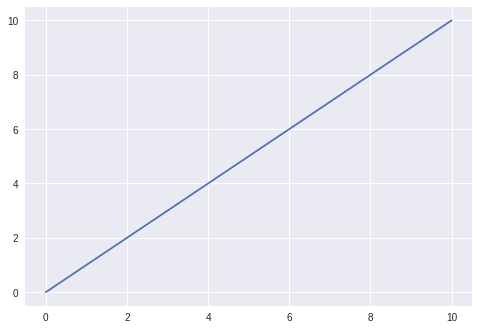

In [0]:
x = np.linspace(0,10,100)
plt.plot(x,x,label='linear')

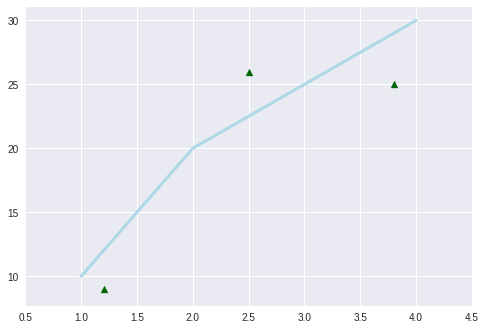

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
ax.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^')
ax.set_xlim(0.5, 4.5)
plt.show()

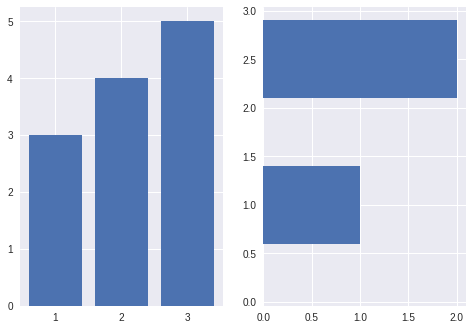

In [0]:
# Initialize the plot
#fig = plt.figure(figsize=(4,2))
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Plot the data
ax1.bar([1,2,3],[3,4,5])
ax2.barh([0.5,1,2.5],[0,1,2])

# Show the plot
plt.show()

# Generating data

In [0]:
# random floats between 0 and 1
np.random.seed(42)
np.random.random(3)

array([0.37454012, 0.95071431, 0.73199394])

In [0]:
# random integers between 1 and 10
np.random.randint(0,5,3)

array([4, 4, 1])

In [0]:
# normal dist with mean 0 and std is 1
np.random.normal(0.0,1.0,3)

array([ 0.27904129,  1.01051528, -0.58087813])

In [0]:
# uniform dist
np.random.uniform(1.0,2.0,3)

array([1.18340451, 1.30424224, 1.52475643])

# Sample datasets

- sklearn has some nice small datasets 
- load_boston good for regression
- load_iris (classification)
- load_digits (image classifiaction)

In [0]:
from sklearn import datasets

In [0]:
# load boston dataset
boston = datasets.load_boston()

In [0]:
features = boston.data
target = boston.target

In [0]:
type(features)

numpy.ndarray

In [0]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='|S7')

In [0]:
df = pd.DataFrame(features,columns=boston.feature_names)
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


# Plotting with pandas

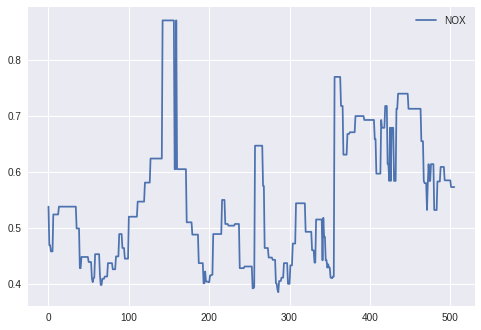

In [0]:
# line plot
df.plot(y='NOX',kind='line') # same as df.plot.line()

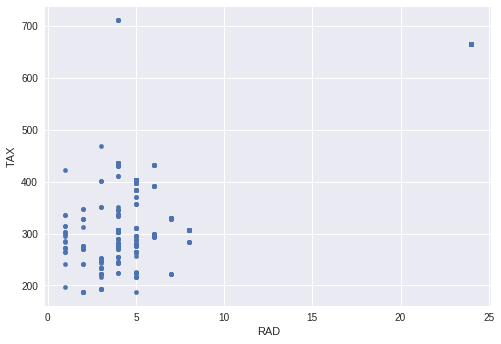

In [0]:
# make scatter plot
df.plot(x='RAD',y='TAX',kind='scatter')

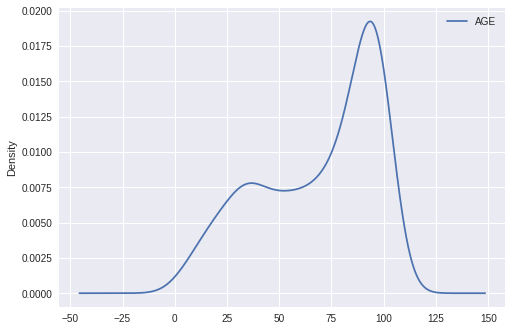

In [0]:
df.plot(y='AGE',kind='density')

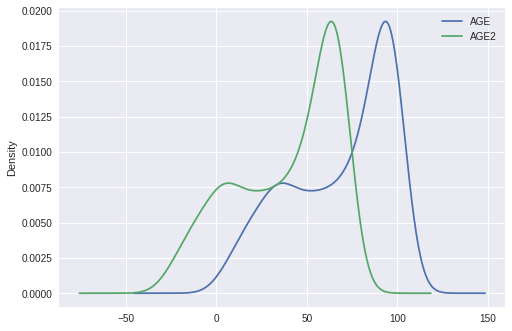

In [0]:
df['AGE2'] = df['AGE'] -30
df.plot(y=['AGE','AGE2'],kind='density')

In [0]:
df = pd.DataFrame({'name':['appel','peer','banaan'],'weight':[30,19,22]})

In [0]:
df

,name,weight
0,appel,30
1,peer,19
2,banaan,22


In [0]:
idx = df['weight']>20
df2 = df.loc[idx]
df2

,name,weight
0,appel,30
2,banaan,22


In [0]:
idx2 = df2['name'] == 'banaan'
print(idx2.shape)
print(idx2)

(2,)
0    False
2     True
Name: name, dtype: bool


In [0]:
df2.loc[idx2]

,name,weight
2,banaan,22


# Regex

In [0]:
match = re.search(r'iii', 'piiig') 

In [0]:
match.group()

'iii'

In [0]:
print(re.search(r'app', 'ikeeteenappel').group())
print(re.search(r'app', 'ikeeteenappelvandaageneenappelgister').group())

app
app


In [0]:
print(re.search(r'app|banaan', 'ikeeteenappelofeenbanaan').group())
print(re.search(r'app|banaan', 'ikeeteenbanaanofeenappel').group())

app
banaan


In [0]:
# now digit + appel
print(re.search(r'\d+appel', 'ikeetelkedag10appels').group())

10appel


In [0]:
# now digit + appel + koe
print(re.search(r'\d+appel|koe', 'ikeetelkedag10appelsofeenkoe').group())

10appel
